In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.ioff()

In [2]:
D = []
for name in tqdm(glob.glob('current_test/h_*')):
    _, n, spam, avgover, batches, batchsize = name.split('/')[-1].split('_')
    with open(name,'r') as f:
        ds = eval(f.read())
        for i,d in enumerate([ds[0],*ds[1]]):
            d = pd.DataFrame(d)
            d['epoch'] = d.index
            d['n'] = int(n)
            d['spam'] = float(spam)
            d['avgover'] = float(avgover)
            d['batches'] = int(batches)
            d['batchsize'] = int(batchsize)
            d['duration'] = i 
            D.append(d)
D = pd.concat(D,ignore_index=True)

100%|██████████| 288/288 [00:49<00:00,  5.87it/s]


In [3]:
D['datasize'] = D['batches']*D['batchsize']*D['avgover']
D['pulses'] = D['batches']*D['batchsize']
D['P'] = D['pulses']
D['S'] = D['avgover']
D['C'] = D['loss']
D['V'] = D['val_loss']
D['SPAM'] = D['spam']
D['Δ'] = D['duration']
Dshortest = D[(D.duration==0)]
Dlast = D.loc[D.groupby(['n', 'spam', 'avgover', 'batches', 'batchsize', 'duration'])['epoch'].idxmax()]
Dspamless = Dlast[Dlast.spam==0]
Dspammost = Dlast[Dlast.spam==0.01]
Dfin = Dlast[Dlast.avgover<1e10]
Ddeltazero = Dfin[Dfin.duration==0]
Ddeltazerobest = Ddeltazero.loc[Ddeltazero.groupby('SPAM')['val_loss'].idxmin()]

In [4]:
D.columns

Index(['binary_crossentropy', 'log_mse', 'loss', 'lr', 'mean_absolute_error',
       'mean_squared_error', 'std_b', 'std_e', 'std_k',
       'val_binary_crossentropy', 'val_loss', 'val_mean_absolute_error',
       'val_mean_squared_error', 'w_l1_b', 'w_l1_b_mackay', 'w_l1_k',
       'w_l1_k_mackay', 'epoch', 'n', 'spam', 'avgover', 'batches',
       'batchsize', 'duration', 'datasize', 'pulses', 'P', 'S', 'C', 'V',
       'SPAM', 'Δ'],
      dtype='object')

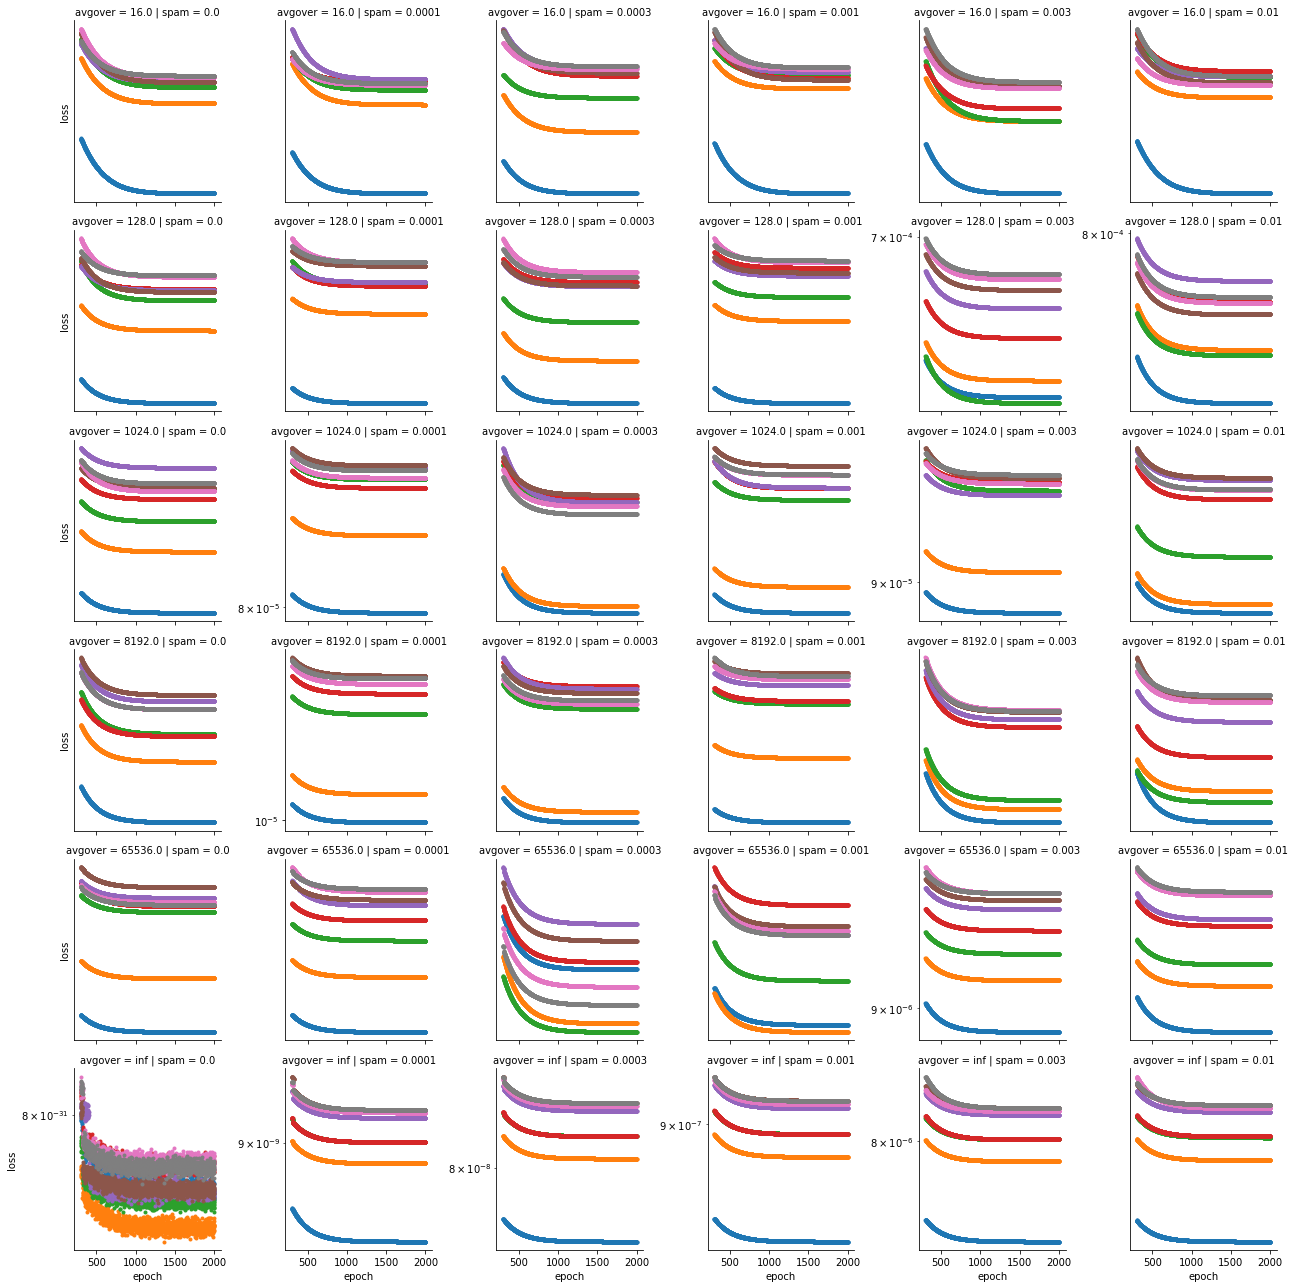

In [5]:
fg = sns.FacetGrid(Dshortest[(Dshortest.epoch>300)], col='spam', row='avgover', hue='pulses',sharey=False)
fg.map(plt.semilogy,'epoch','loss', marker='.', linewidth=0)
#fg.map(plt.semilogy,'epoch','lr')

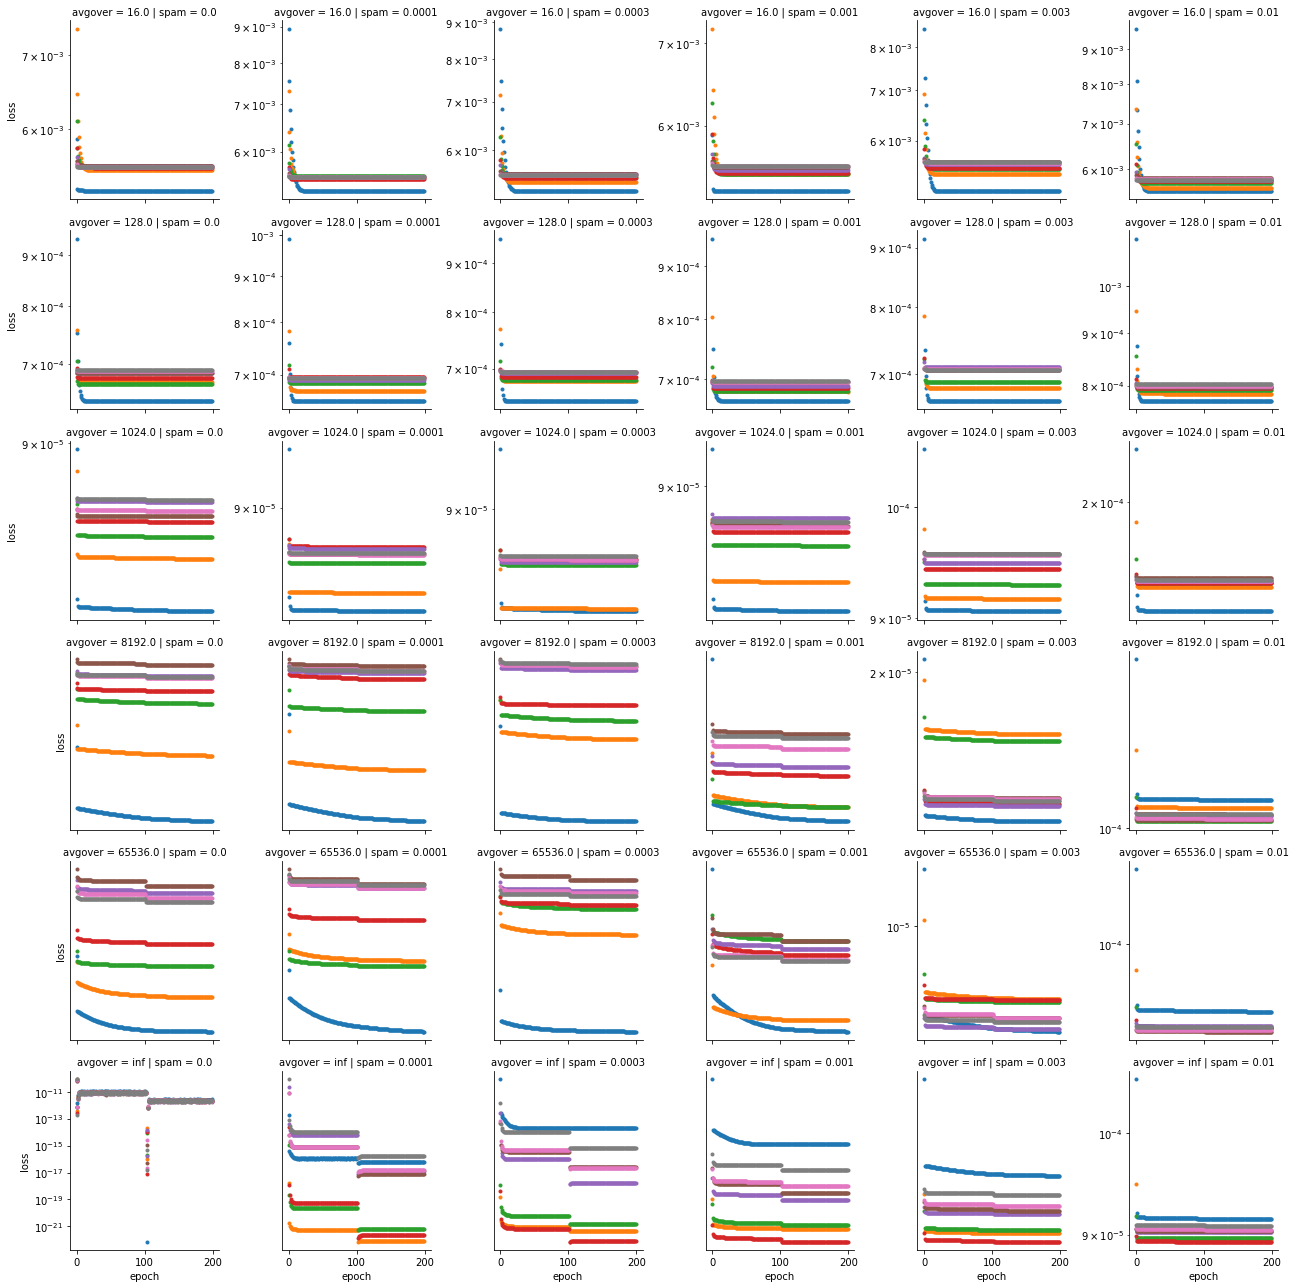

In [6]:
fg = sns.FacetGrid(D[(D.duration==5)], col='spam', row='avgover', hue='pulses',sharey=False)
fg.map(plt.semilogy,'epoch','loss', marker='.', linewidth=0)
#fg.map(plt.semilogy,'epoch','lr')

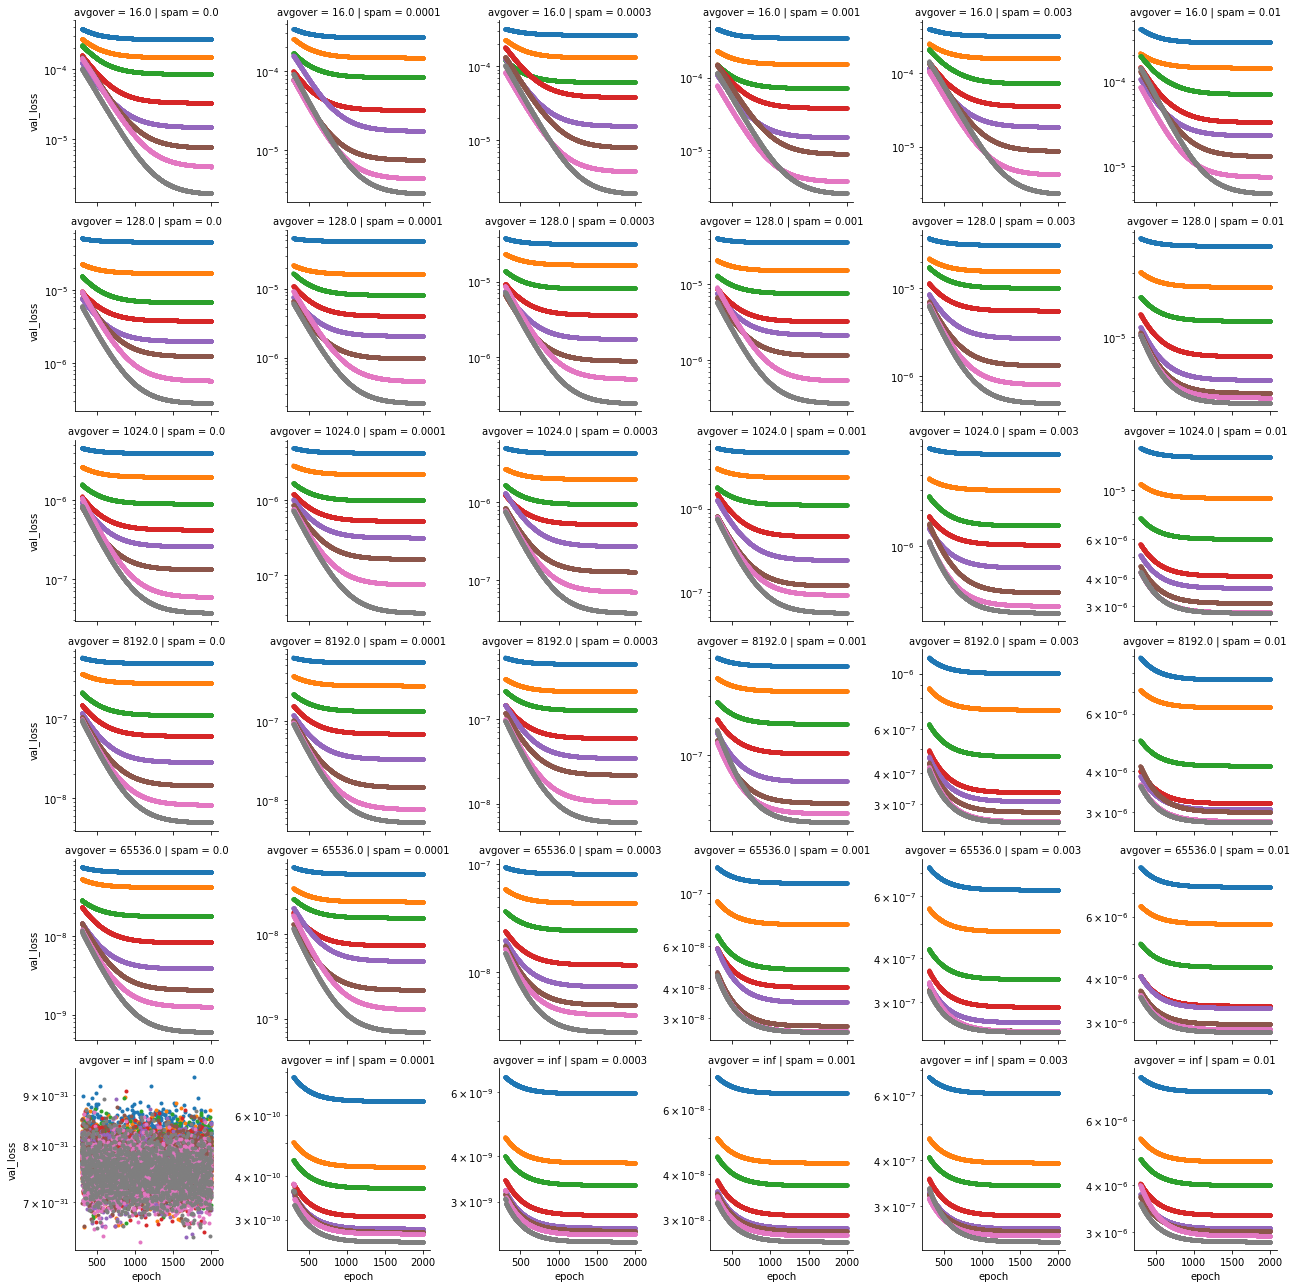

In [7]:
fg = sns.FacetGrid(Dshortest[(Dshortest.epoch>300)], col='spam', row='avgover', hue='pulses',sharey=False)
fg.map(plt.semilogy,'epoch','val_loss', marker='.', linewidth=0)
#fg.map(plt.semilogy,'epoch','lr')

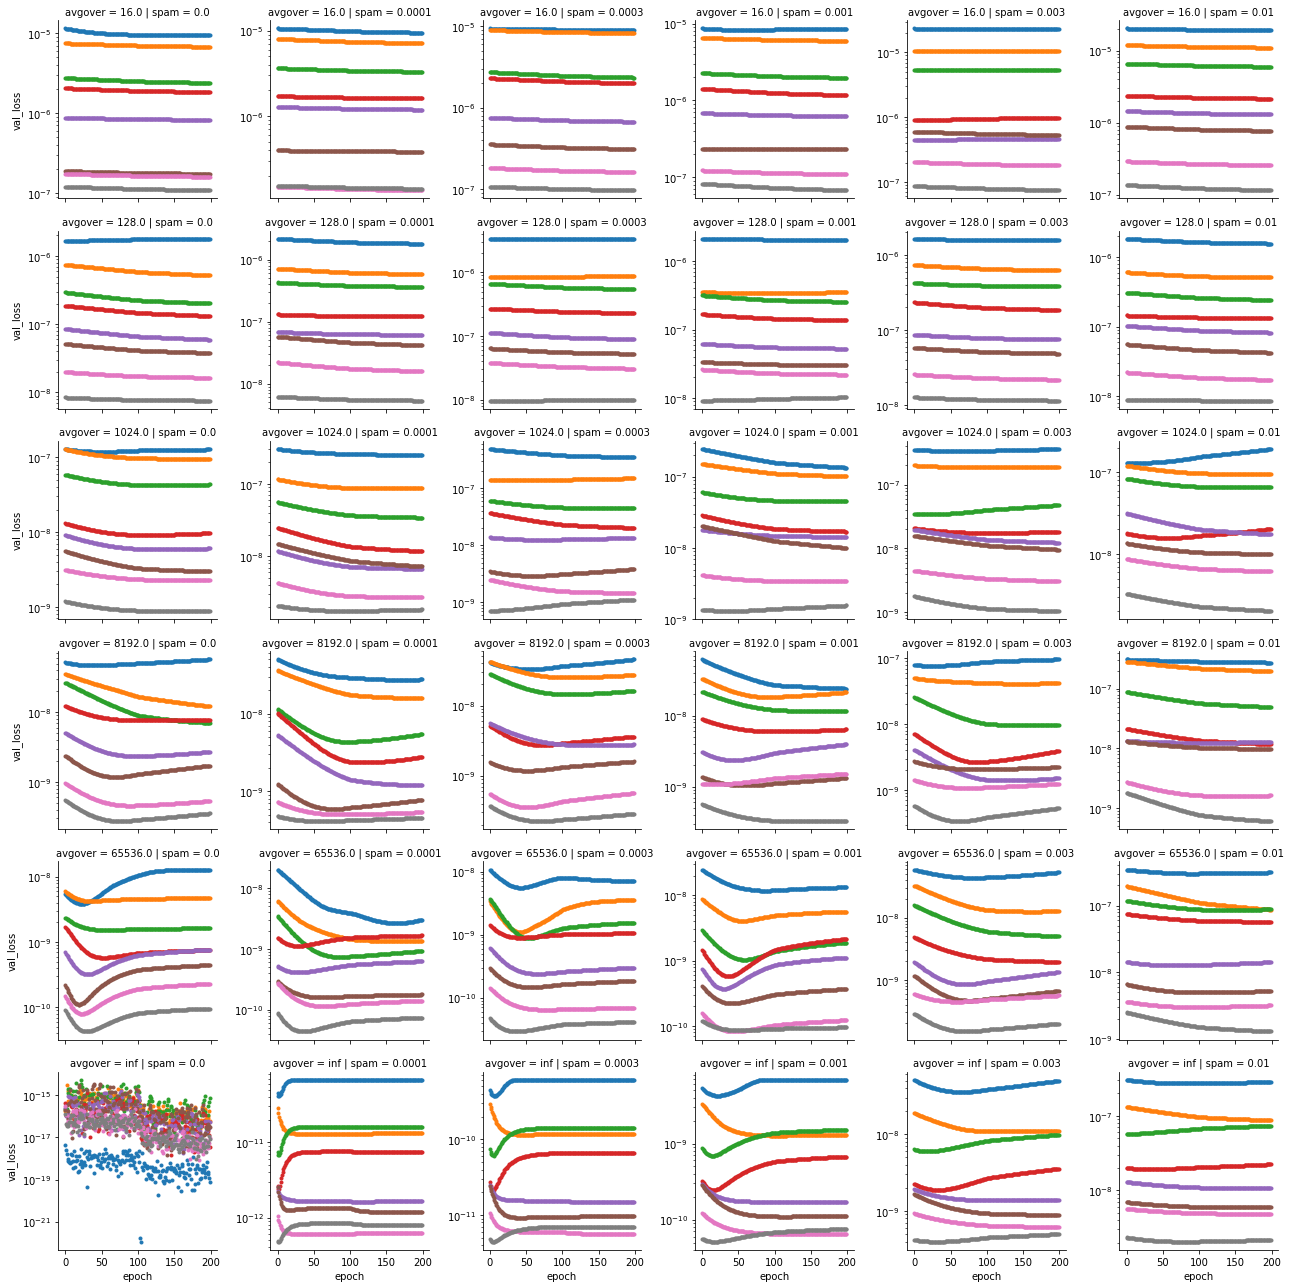

In [8]:
fg = sns.FacetGrid(D[(D.duration==5)], col='spam', row='avgover', hue='pulses',sharey=False)
fg.map(plt.semilogy,'epoch','val_loss', marker='.', linewidth=0)
#fg.map(plt.semilogy,'epoch','lr')

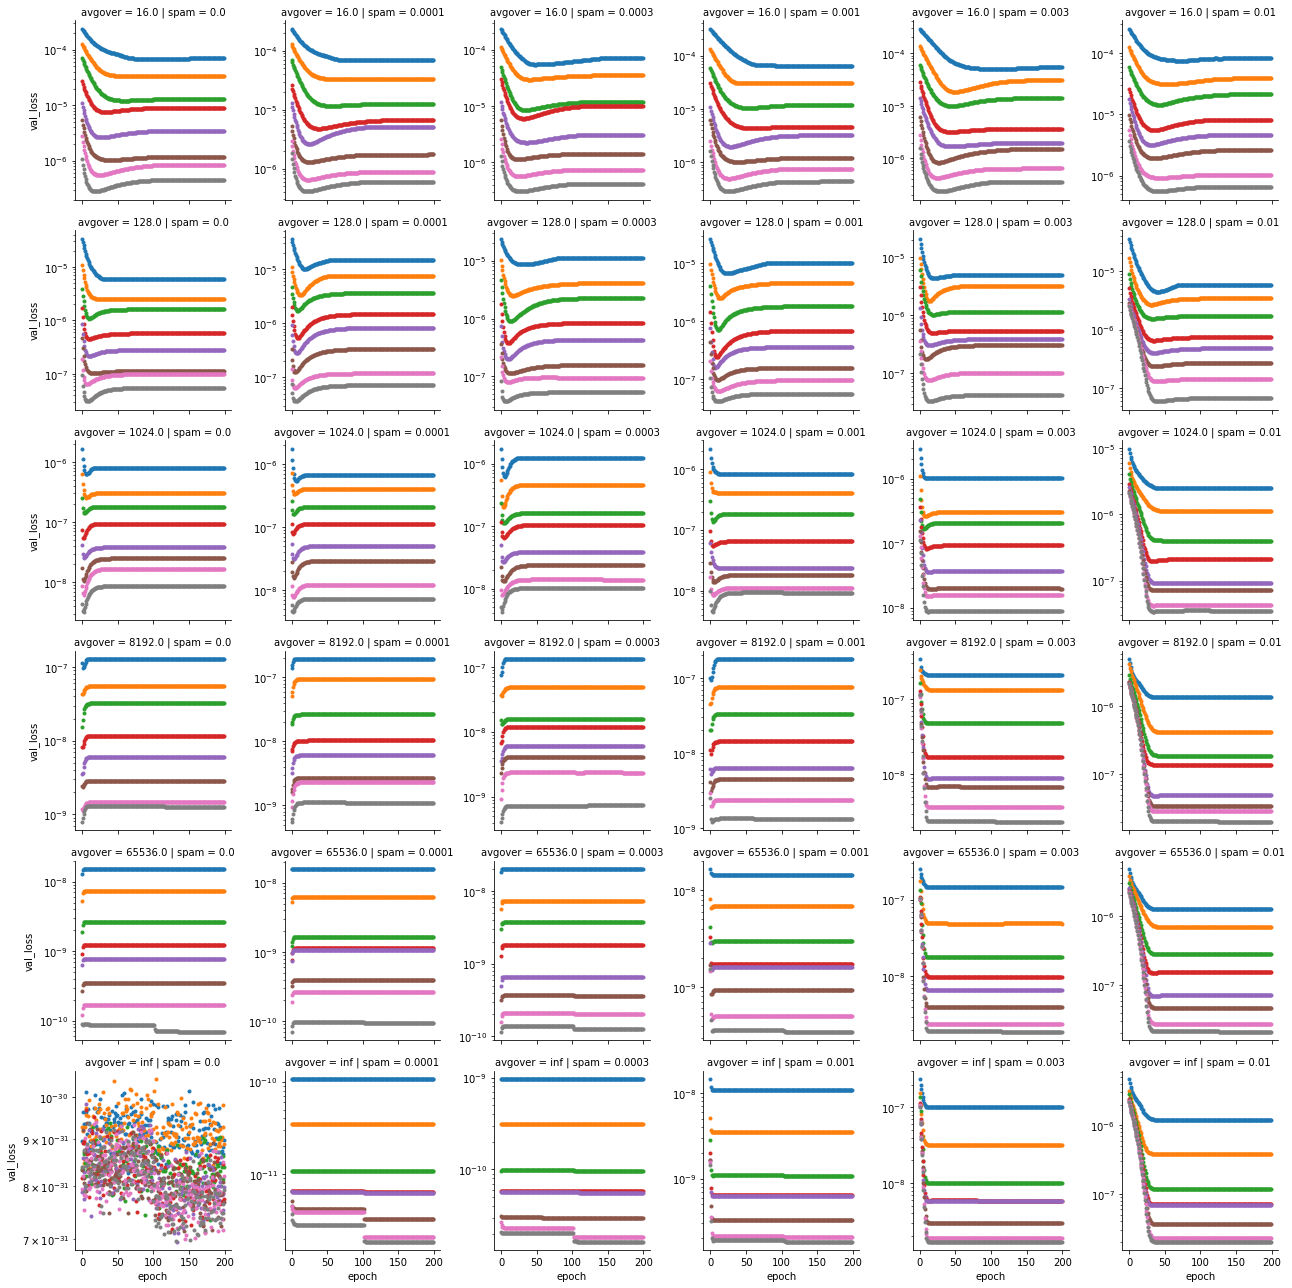

In [9]:
fg = sns.FacetGrid(D[(D.duration==1)], col='spam', row='avgover', hue='pulses',sharey=False)
fg.map(plt.semilogy,'epoch','val_loss', marker='.', linewidth=0)
#fg.map(plt.semilogy,'epoch','lr')

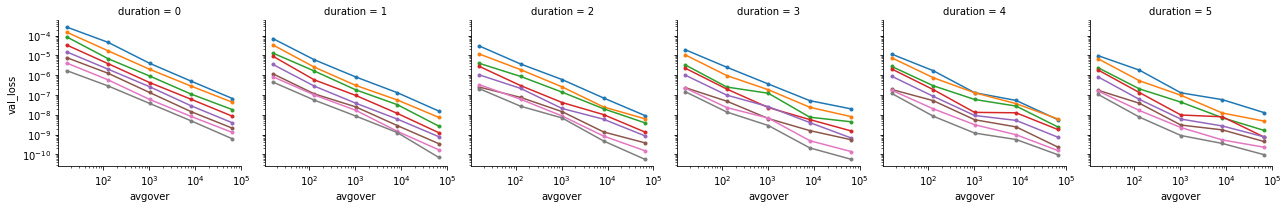

In [10]:
fg = sns.FacetGrid(Dspamless, hue='batches', col='duration')
fg.map(plt.loglog,'avgover','val_loss',marker='.')

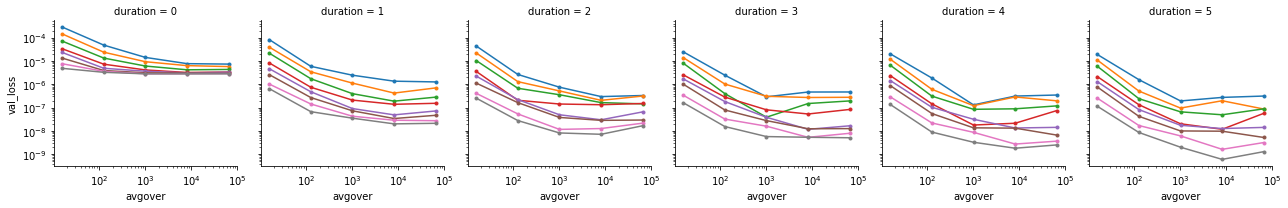

In [11]:
fg = sns.FacetGrid(Dspammost, hue='batches', col='duration')
fg.map(plt.loglog,'avgover','val_loss',marker='.')

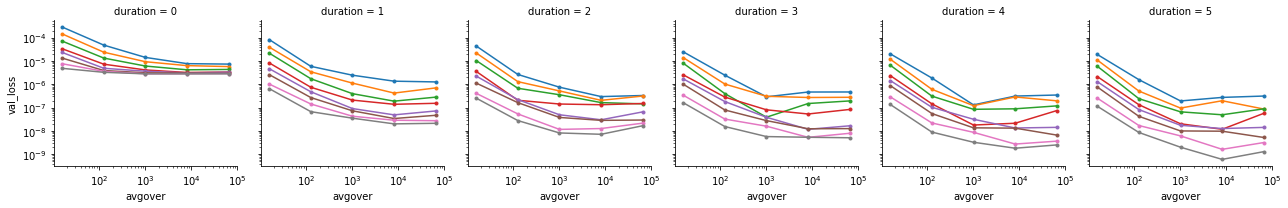

In [12]:
fg = sns.FacetGrid(Dspammost, hue='batches', col='duration')
fg.map(plt.loglog,'avgover','val_loss',marker='.')

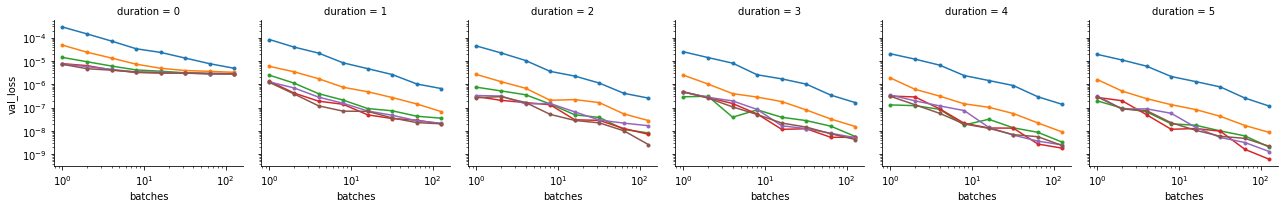

In [13]:
fg = sns.FacetGrid(Dspammost, hue='avgover', col='duration')
fg.map(plt.loglog,'batches','val_loss',marker='.')

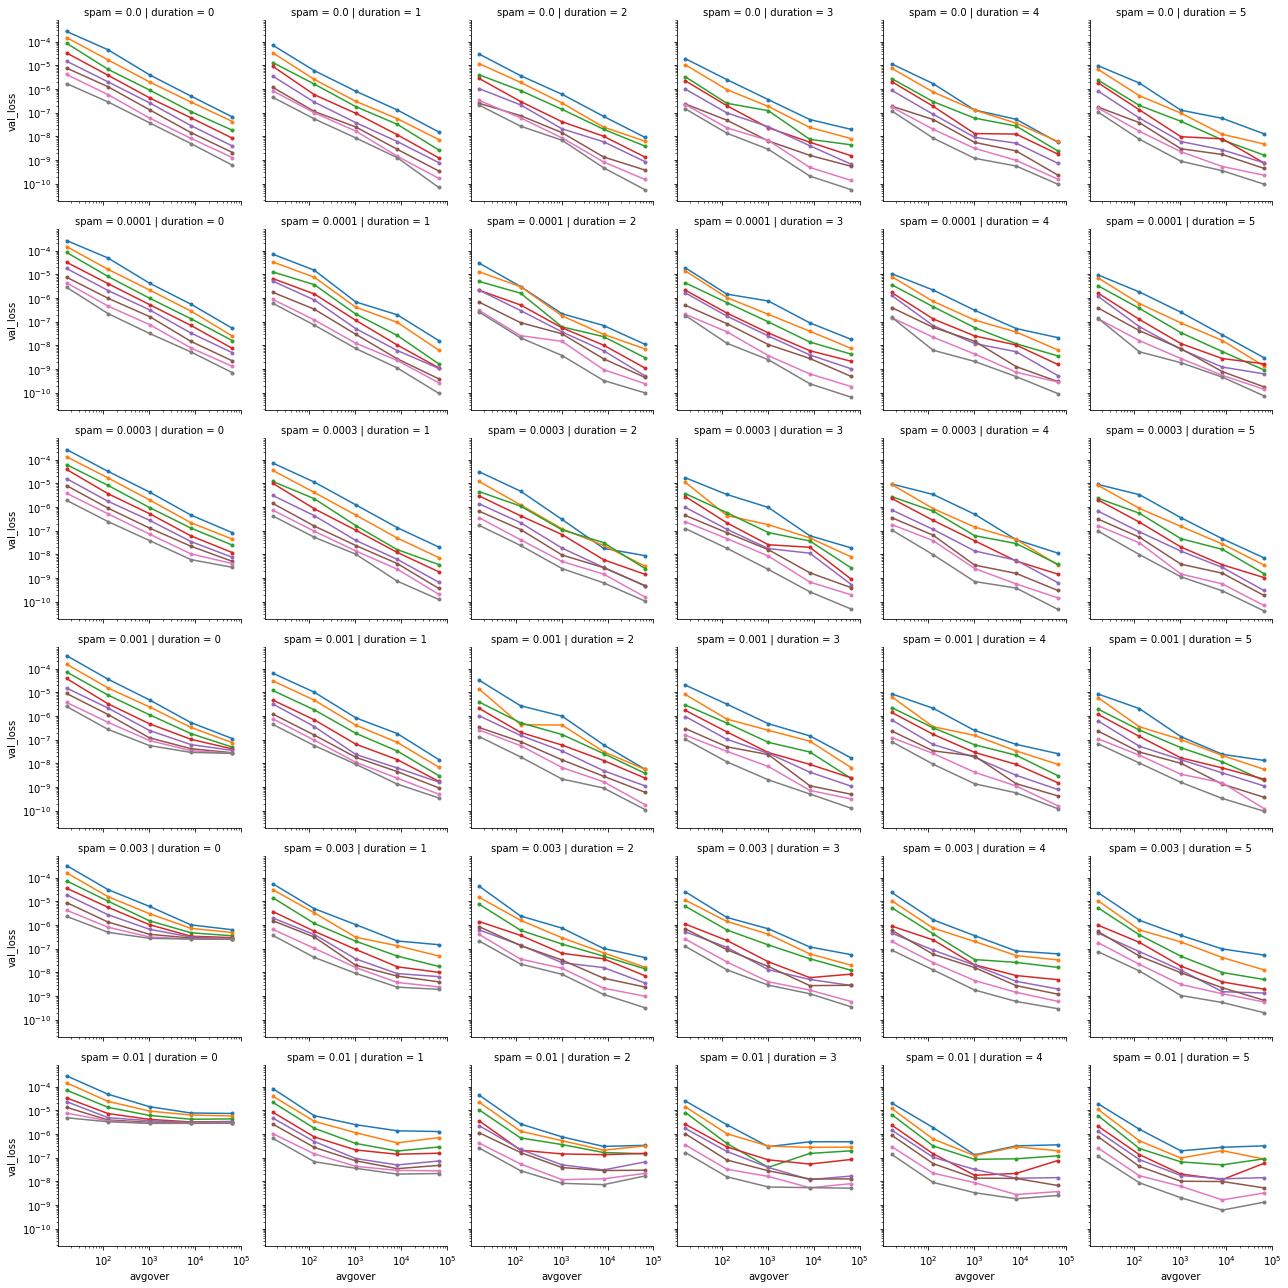

In [14]:
fg = sns.FacetGrid(Dlast, row='spam', hue='batches', col='duration')
fg.map(plt.loglog,'avgover','val_loss',marker='.')

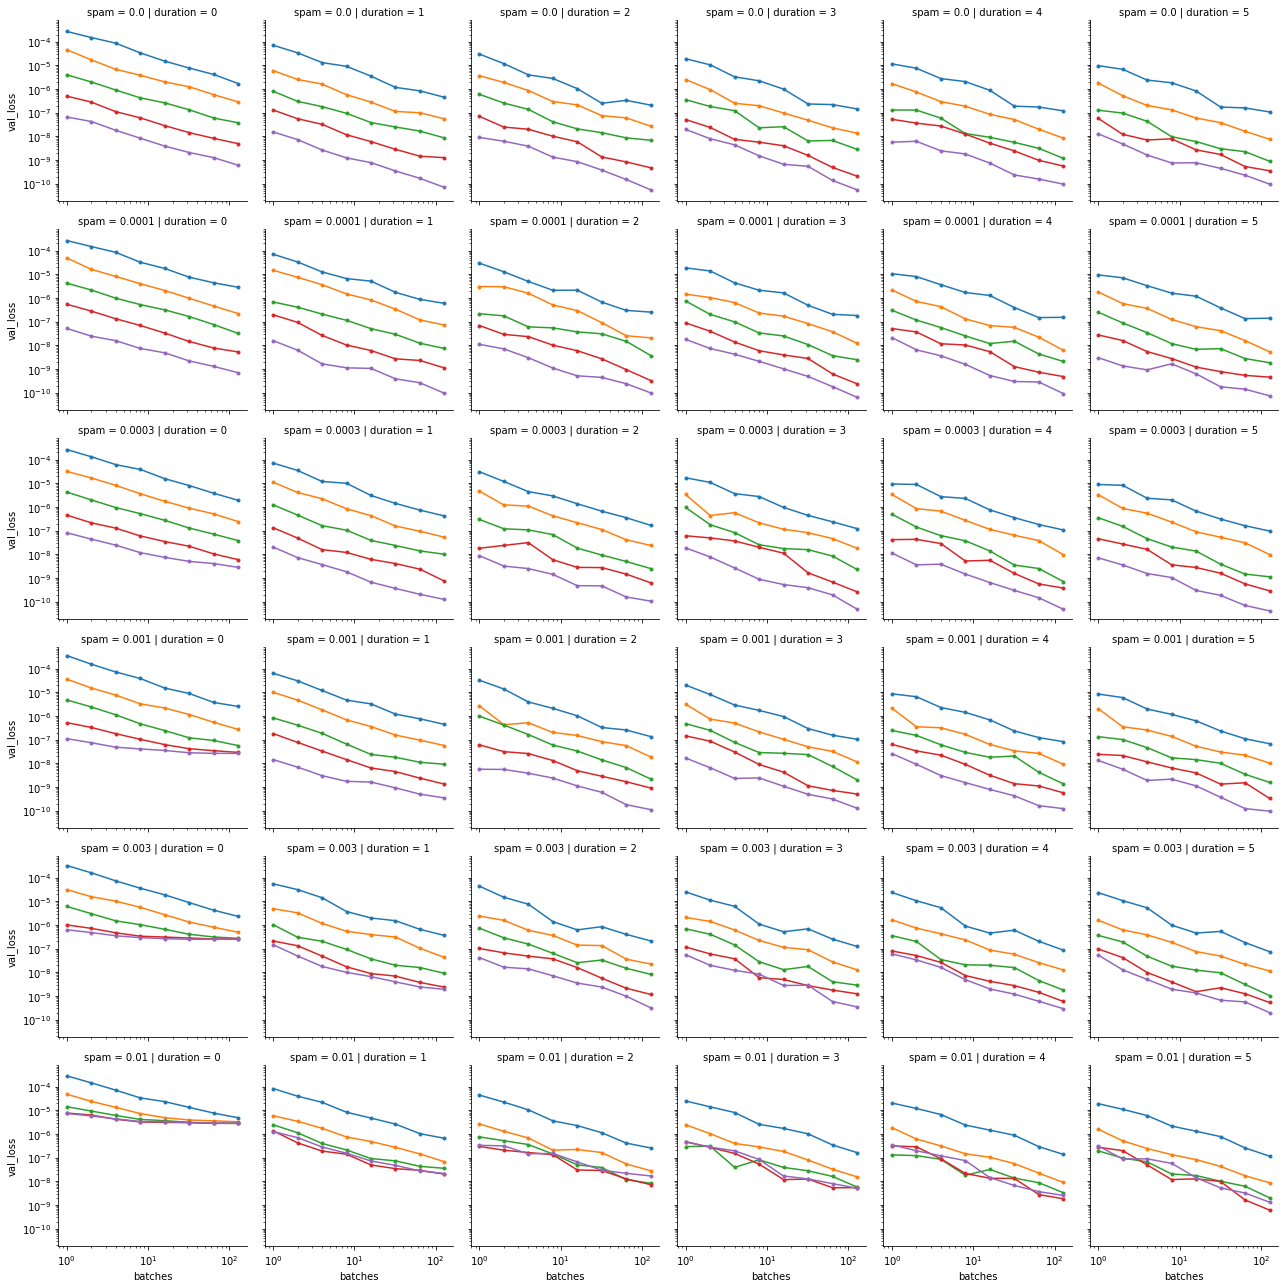

In [15]:
fg = sns.FacetGrid(Dlast[Dlast.avgover<1e10], row='spam', hue='avgover', col='duration')
fg.map(plt.loglog,'batches','val_loss',marker='.')

In [15]:
import matplotlib.mlab as mlab

In [16]:
def vectcontour(x,y,z,f=True,**kw):
    x = np.log2(x)
    y = np.log2(y)
    z = np.log(z)
    xx,yy = np.meshgrid(np.unique(x),np.unique(y))
    zz = mlab.griddata(x,y,z,xx,yy,interp='linear')
    if f==True:
        return plt.contourf(xx,yy,zz,**kw)
    else:
        return plt.contour(xx,yy,zz,**kw)        

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


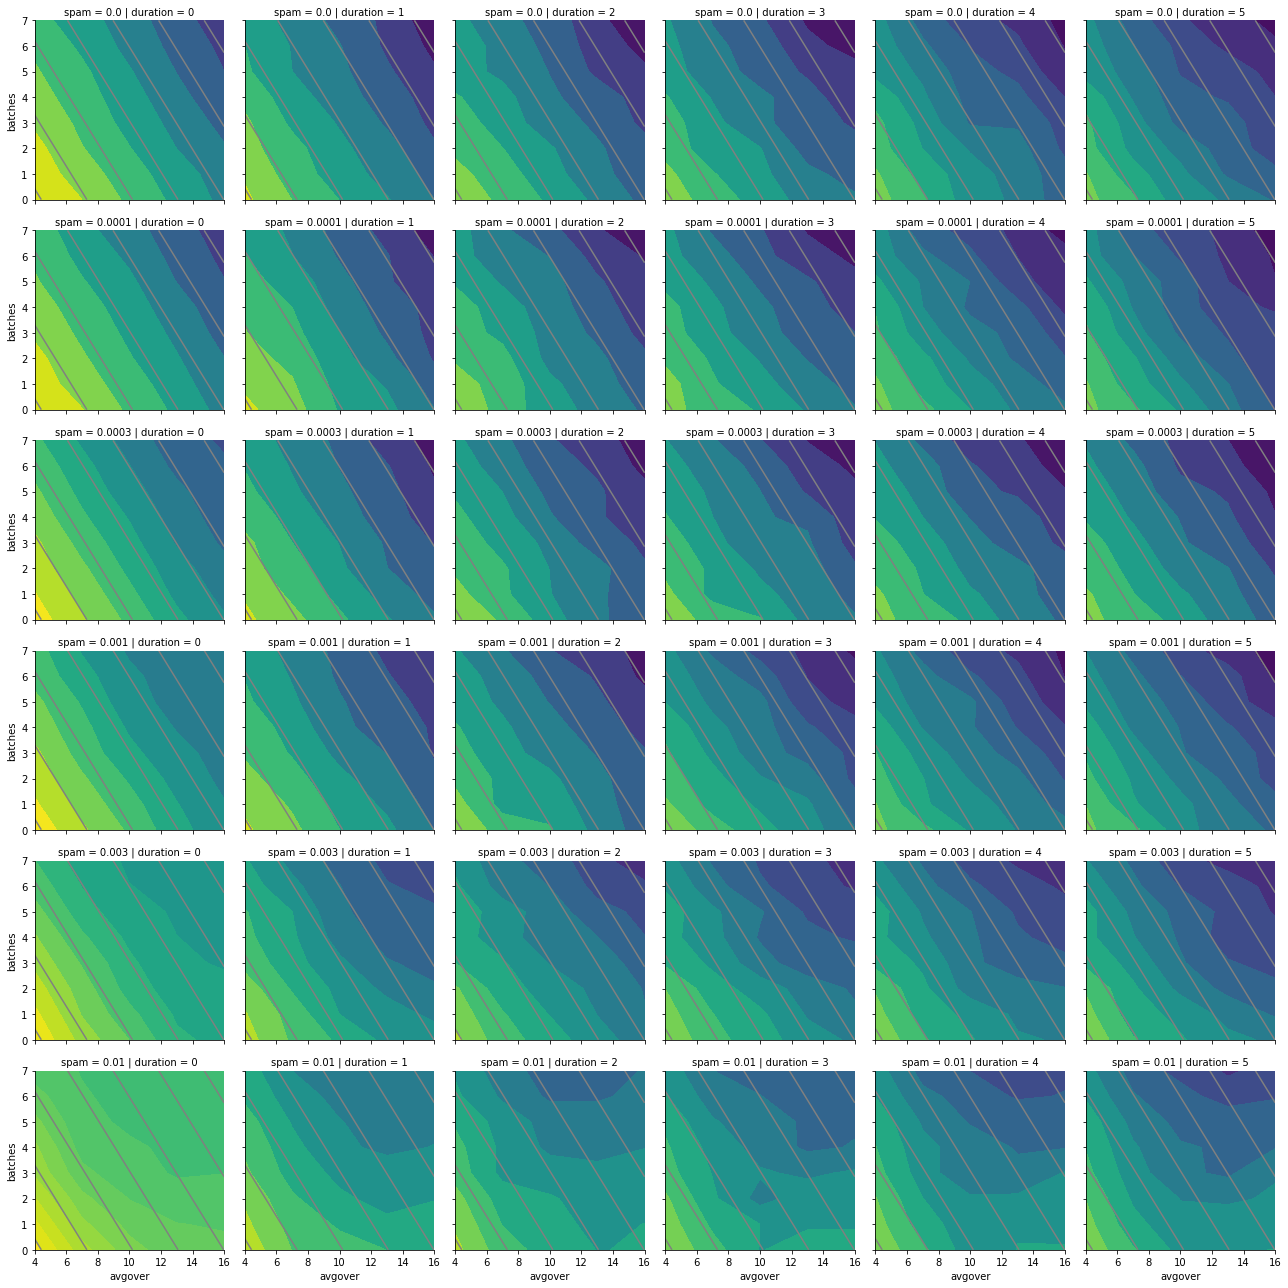

In [18]:
fg = sns.FacetGrid(Dfin, row='spam', col='duration')
fg.map(vectcontour,'avgover','batches','val_loss',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'avgover','batches','datasize',f=False,colors='grey')

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


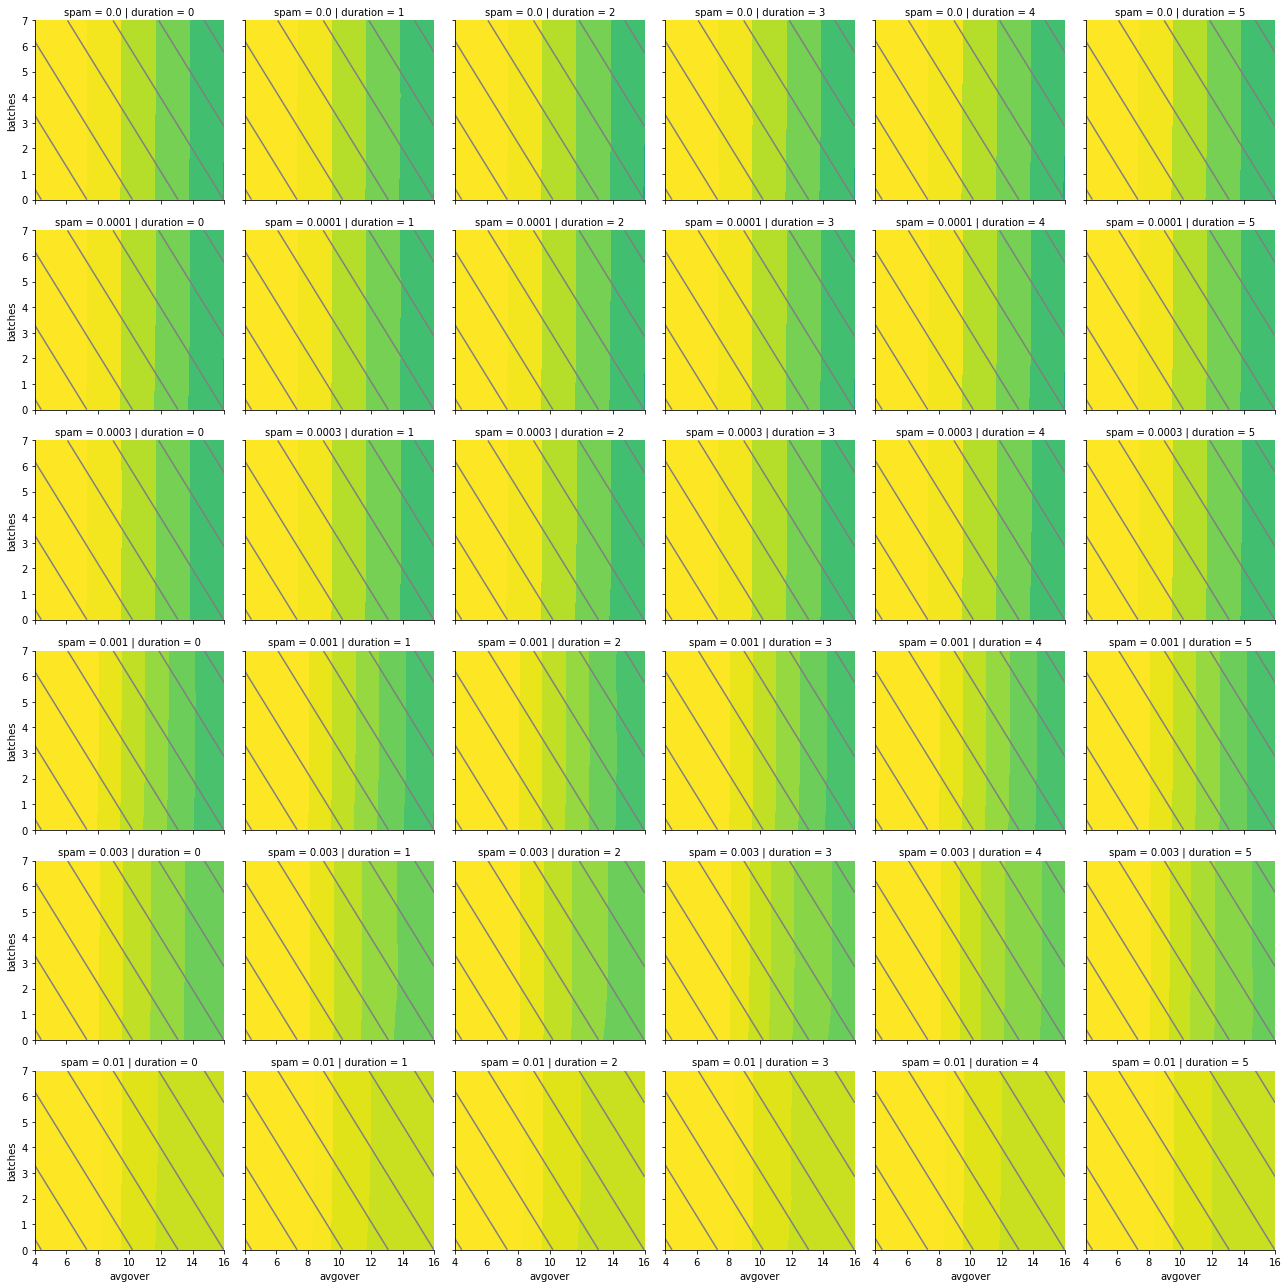

In [19]:
fg = sns.FacetGrid(Dfin, row='spam', col='duration')
fg.map(vectcontour,'avgover','batches','loss',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'avgover','batches','datasize',f=False,colors='grey')

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


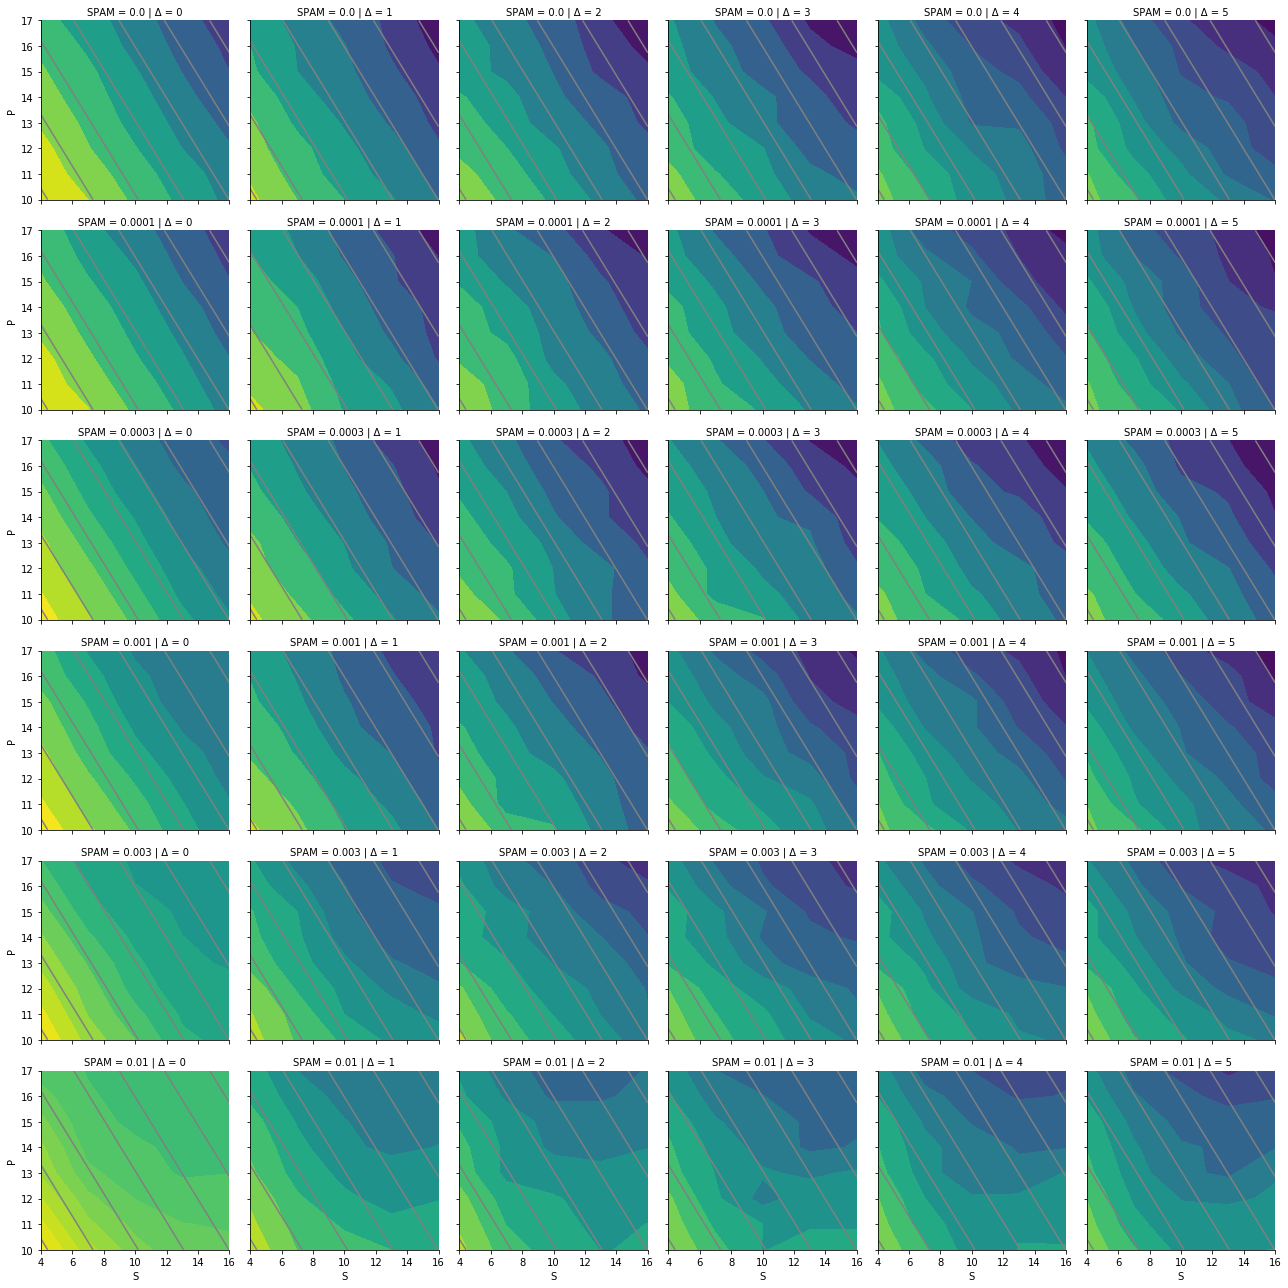

In [20]:
fg = sns.FacetGrid(Dfin, row='SPAM', col='Δ')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


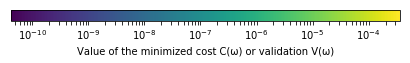

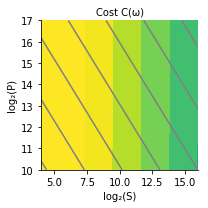

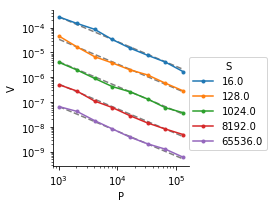

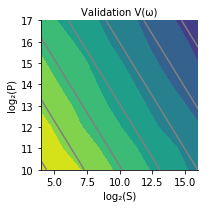

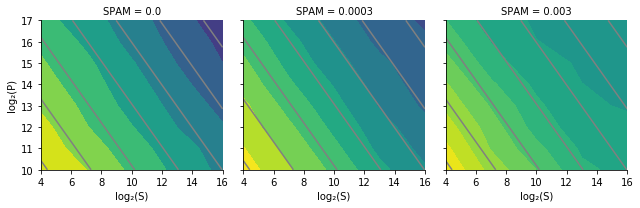

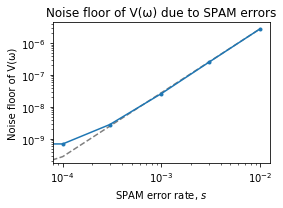

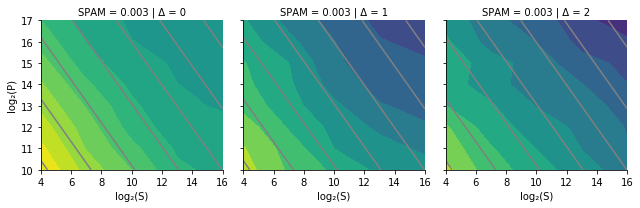

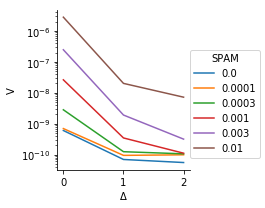

In [17]:
plt.close('all')

fig = plt.figure(figsize=(6, 1))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
import matplotlib as mpl
cmap = mpl.cm.viridis
norm = mpl.colors.LogNorm(vmin=Dfin.val_loss.min(), vmax=Dfin.val_loss.max())
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Value of the minimized cost C(ω) or validation V(ω)')
fig.savefig('colorbar.png',dpi=400)

fg = sns.FacetGrid(Dfin[(Dfin.duration==0)&(Dfin.spam==0)], row='SPAM', col='Δ')
fg.map(vectcontour,'S','P','loss',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_titles('Cost C(ω)')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('C_spam0d0.png',dpi=400)

Deasy = Dfin[(Dfin.duration==0)&(Dfin.spam==0)]
fg = sns.FacetGrid(Deasy, hue='S', legend_out=True)
fg.map(plt.loglog,'P','V',marker='.')
for s in Deasy.S.unique():
    d = Deasy[Deasy.S==s]
    plt.loglog(d.P, Deasy[Deasy.S==16].V.as_matrix()[0]*16/s*d.P.as_matrix()[0]/d.P,'k--',zorder=-10,alpha=0.5)
fg.add_legend()
fg.savefig('V_spam0d0_scaling.png',dpi=400)

fg = sns.FacetGrid(Dfin[(Dfin.duration==0)&(Dfin.spam==0)], row='SPAM', col='Δ')
fg.map(vectcontour,'S','P','val_loss',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_titles('Validation V(ω)')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_spam0d0.png',dpi=400)

fg = sns.FacetGrid(Dfin[(Dfin['Δ']==0) & Dfin.SPAM.isin([0,0.0003,0.003])], col='SPAM')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_spam_up.png',dpi=400)

plt.figure(figsize=(4,3))
plt.loglog(Ddeltazerobest.SPAM,
           Ddeltazerobest.val_loss.as_matrix()[-1]/Ddeltazerobest.SPAM.as_matrix()[-1]**2*Ddeltazerobest.SPAM**2,
           'k--',alpha=0.5)
plt.loglog(Ddeltazerobest.SPAM,Ddeltazerobest.val_loss,'.-')
plt.title('Noise floor of V(ω) due to SPAM errors')
plt.xlabel('SPAM error rate, $s$')
plt.ylabel('Noise floor of V(ω)')
plt.tight_layout()
plt.savefig('V_spam_floor.png',dpi=400)

fg = sns.FacetGrid(Dfin[Dfin['Δ'].isin([0,1,2]) & (Dfin['SPAM']==0.003)], row='SPAM', col='Δ')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_d_up.png',dpi=400)

idx = Dfin[Dfin['Δ']<=2].groupby(by=['SPAM','Δ']).val_loss.idxmin()
fg = sns.FacetGrid(Dfin.loc[idx], hue='SPAM')
fg.map(plt.semilogy,'Δ','V')
fg.add_legend()
fg.savefig('V_d_floor.png',dpi=400)

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


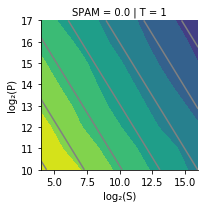

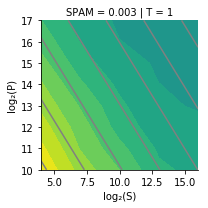

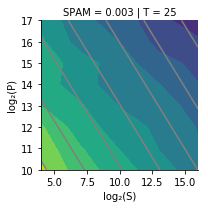

In [25]:
Dfin['T'] = 5**Dfin['Δ']

fg = sns.FacetGrid(Dfin[(Dfin['Δ']==0) & (Dfin['SPAM']==0)], row='SPAM', col='T')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_delta0_spam0.png',dpi=400)

fg = sns.FacetGrid(Dfin[(Dfin['Δ']==0) & (Dfin['SPAM']==0.003)], row='SPAM', col='T')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_delta0_spam003.png',dpi=400)

fg = sns.FacetGrid(Dfin[(Dfin['Δ']==2) & (Dfin['SPAM']==0.003)], row='SPAM', col='T')
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
fg.savefig('V_delta2_spam003.png',dpi=400)

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


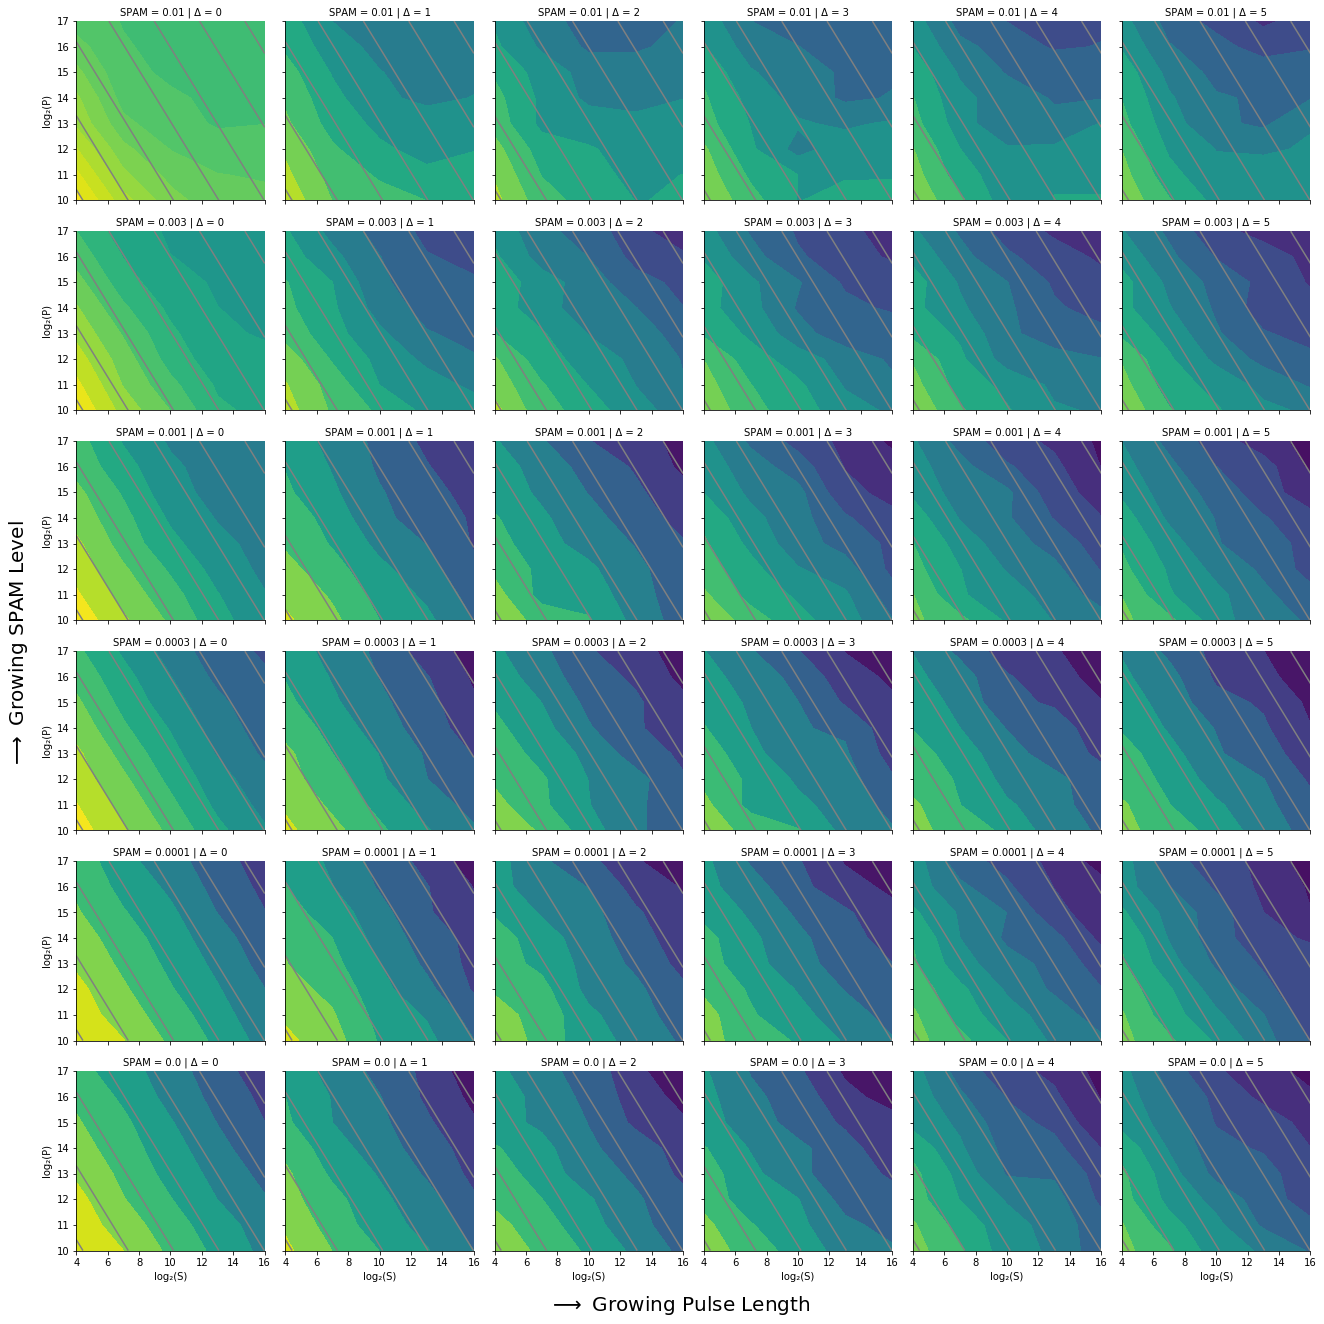

In [18]:
fg = sns.FacetGrid(Dfin, row='SPAM', col='Δ', row_order=list(reversed(Dfin.SPAM.unique())))
fg.map(vectcontour,'S','P','V',f=True,
       vmin=np.log(Dfin.val_loss.min()),vmax=np.log(Dfin.val_loss.max()),
      #levels=np.linspace(np.log(Dfin.val_loss.min()),np.log(Dfin.val_loss.max()),80)
      )
fg.map(vectcontour,'S','P','datasize',f=False,colors='grey')
fg.set_xlabels('log₂(S)')
fg.set_ylabels('log₂(P)')
plt.figtext(0.5,-0.01,r"$\longrightarrow$ Growing Pulse Length", va="center", ha="center", size=20)
plt.figtext(-0.01,0.5,r"$\longrightarrow$ Growing SPAM Level", va="center", ha="center", size=20, rotation='vertical')
fg.savefig('V_all.png',dpi=400)

In [5]:
from hamest import *
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam, Nadam
from ringham import *

S = [16, 128, 1024, 8192, 65536]
P = [_*1024 for _ in [1, 2, 4, 8, 16, 32]]

n = 3
nb_drives = qubitring_ndrives(n)
hs = np.stack([_.full() for _ in qubitring_all_ops(n)])

_epsilons = [0.1]*n
_etas = [0.01]*n
_deltas = [2.]*qubitring_ndrives(n)
jitter = 0.05
s = np.random.RandomState(seed=36)
_epsilons *= s.normal(loc=1., scale=jitter, size=n)
_etas     *= s.normal(loc=1., scale=jitter, size=n)
_deltas   *= s.normal(loc=1., scale=jitter, size=qubitring_ndrives(n))

H0 = qubitring_H0(n, _epsilons, _etas).full()
Hdrives = np.stack([_.full() for _ in qubitring_Hdrives(n, _deltas)])

correct_weights = qubitring_perfect_pauli_weights(n, _epsilons, _etas, _deltas, noise=None)

validation_data = next(
    qubitring_datagen(H0, Hdrives,
                      n=n, batch_size=P[-1], Delta=1., seed=123, average_over=float('inf')))

model = Sequential()
model.add(StateProbabilitiesPaulied(nqubits=n, ndrives=nb_drives, paulies=hs,
                                    l1_lambda=None))
model.compile(loss='mse', optimizer=Nadam(lr=5e-4), metrics=['mse', 'mae', 'binary_crossentropy'])

/home/fas/jiang/sk943/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import scipy.optimize
def rot(theta, alpha):
    theta[:] = theta[0] # too lazy to rewrite it as a scalar
    cos, sin = np.cos(theta), np.sin(theta)
    w = np.copy(alpha)
    w = w.T
    for i,c,s in zip([3,4,5],cos,sin):
        w[i+3,i], w[i,i] = s*w[i,i]+c*w[i+3,i], -s*w[i+3,i]+c*w[i,i] 
    for i,c,s in zip([6,7,8],cos,sin):
        w[i-3,i], w[i,i] = -s*w[i,i]+c*w[i-3,i], s*w[i-3,i]+c*w[i,i]
    return w.T
def err(theta, alpha):
    return np.mean((correct_weights[0]-rot(theta, alpha))**2)

In [7]:
entropy = np.mean(np.sum(validation_data[1]*np.log(validation_data[1]), axis=1))
rec = []
k_error_mats = []
k_error_gauge_mats = []
for i,s in enumerate(S):
    print('\r',i+1,'of',len(S),end='',flush=True)
    for p in P:
        model.load_weights('./current_test/mod_checkpoint_3_0.0_%.1f_%d_1024'%(s,p//1024))
        r = model.predict(validation_data[0])
        mae = np.mean(np.abs(r-validation_data[1]))
        mse = np.mean(np.abs(r-validation_data[1])**2)
        bce = - np.mean(np.sum(validation_data[1]*np.log(r), axis=1)) + entropy
        k_error_mats.append(correct_weights[0]-model.get_weights()[0])
        w_k = np.mean((correct_weights[0]-model.get_weights()[0])**2)
        w_kd = np.mean((correct_weights[0].diagonal()-model.get_weights()[0].diagonal())**2)
        w_b = np.mean((correct_weights[1]-model.get_weights()[1])**2)
        bhat = -np.mean(np.log(np.sum(np.sqrt(r*validation_data[1]),axis=1)))
        opt = scipy.optimize.minimize(lambda t: err(t,model.get_weights()[0]),[0,0,0])
        k_error_gauge_mats.append(opt['fun'])
        rec.append({'S':s,'P':p,'SP':s*p,
                    'MAE':mae,'MSE':mse,'MCE':bce,'MBD':bhat,
                    'KE':w_k,'BE':w_b,'KdE':w_kd,
                    'gaugeKE':opt['fun'],'gauge':opt['x']
                   })

 5 of 5

In [8]:
df = pd.DataFrame(rec)

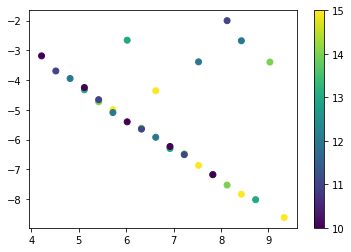

In [9]:
plt.scatter(np.log10(df.SP),np.log10(df.KE),c=np.log2(df.P))
plt.colorbar()

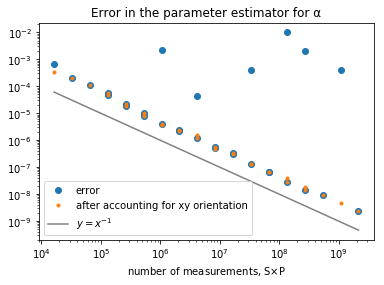

In [11]:
plt.loglog(df.SP,df.KE,'o',)
plt.loglog(df.SP,df.gaugeKE,'.',)
plt.loglog([min(df.SP),max(df.SP)],[1/min(df.SP),1/max(df.SP)],'grey')
plt.legend(['error','after accounting for xy orientation', '$y=x^{-1}$'])
plt.xlabel('number of measurements, S$\\times$P')
plt.title('Error in the parameter estimator for α')
plt.savefig('distances.png',dpi=400)

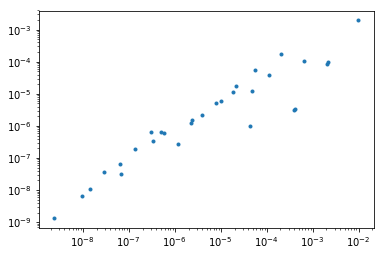

In [12]:
plt.loglog(df.KE,df.KdE,'.')

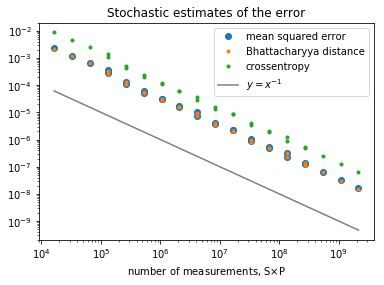

In [13]:
plt.loglog(df.SP,df.MSE*2**n,'o')
plt.loglog(df.SP,df.MBD,'.')
plt.loglog(df.SP,df.MCE,'.')
plt.loglog([min(df.SP),max(df.SP)],[1/min(df.SP),1/max(df.SP)],'grey')
plt.legend(['mean squared error','Bhattacharyya distance','crossentropy', '$y=x^{-1}$'])
plt.xlabel('number of measurements, S$\\times$P')
plt.title('Stochastic estimates of the error')
plt.savefig('distances_stoch.png',dpi=400)

25


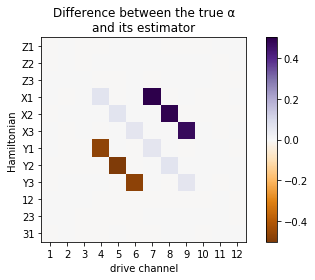

In [221]:
i = np.argmax([np.max(np.abs(_)) for _ in k_error_mats])
bad = k_error_mats[i]
plt.imshow(bad,cmap='PuOr',vmin=-0.5,vmax=0.5)
plt.colorbar()
ticks=['Z1','Z2','Z3','X1','X2','X3','Y1','Y2','Y3','12','23','31']
ax = plt.gca()
ax.set_xticks(range(12))
ax.set_yticks(range(12))
ax.set_xticklabels([str(_+1) for _ in range(12)])
ax.set_yticklabels(ticks)
plt.xlabel('drive channel')
plt.ylabel('Hamiltonian')
plt.title('Difference between the true α\nand its estimator')
plt.tight_layout()
plt.savefig('cute_fail.png',dpi=400,bbox_inches='tight')
print(i)

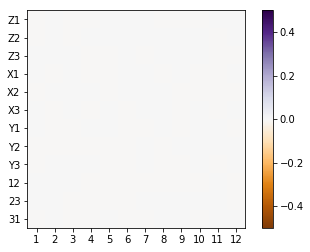

In [206]:
bad = k_error_mats[i]
opt = scipy.optimize.minimize(lambda t: err(t,correct_weights[0]-bad), [0,0,0])
plt.imshow(correct_weights[0]-rot(opt['x'],correct_weights[0]-bad),cmap='PuOr',vmin=-0.5,vmax=0.5)
plt.colorbar()
ticks=['Z1','Z2','Z3','X1','X2','X3','Y1','Y2','Y3','12','23','31']
ax = plt.gca()
ax.set_xticks(range(12))
ax.set_yticks(range(12))
ax.set_xticklabels([str(_+1) for _ in range(12)])
ax.set_yticklabels(ticks);

In [207]:
opt['x']

array([0.25553254, 0.25553254, 0.25553254])

In [208]:
err(opt['x'],correct_weights[0]-bad)

3.9121481935011653e-08